# Deploying a Machine Leaning Model




In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns


<h3>reading the dataset</h3>

In [6]:
df=pd.read_csv(r'C:\Users\TOSHIBA\Desktop\train.csv')

<h3>Looking at the info of the data</h3>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    1278 non-null   float64
 1   col2    1278 non-null   float64
 2   output  1278 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.1 KB


<h3>Looking at the decribe function</h3>

In [8]:
df.describe()

,col1,col2,output
count,1278.000000,1278.000000,1278.000000
mean,-2.407947,6.656915,0.602504
std,68.412871,67.506875,0.489572
min,-134.412463,-116.651027,0.000000
25%,-45.968703,-44.272914,0.000000
50%,-4.168508,7.249885,1.000000
75%,37.690801,50.458071,1.000000
max,134.499614,134.499262,1.000000


<h3>separating independent and dependent variables</h3>

In [ ]:
x=df.loc[:,['col1','col2']]
y=df[['output']]

<h3>Standardization of the data x</h3>

In [28]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler
standardized_data = Scaler().fit_transform(x)
print(standardized_data.shape)

(1278, 2)


In [29]:
features=['col1','col2']

<h3>Standardized data</h3>

In [30]:
df2 = pd.DataFrame(standardized_data,columns = features)
df2

,col1,col2
0,-0.525819,1.575909
1,-0.547050,1.738080
2,-0.778379,1.598907
3,-0.496739,1.318302
4,-0.540442,1.561090
...,...,...
1273,-0.067398,-0.053804
1274,0.117586,-0.024554
1275,-0.162218,-0.287958
1276,-0.161490,-0.098420


<h3>Train test splitting the data as required</h3>

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

<h3>Importing Required models</h3>

In [36]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

<h3>Calculating accuracy scores of ML models</h3>

In [38]:
Classifiers = [
    LogisticRegression(),
    SVC(kernel='linear'),
    SVC(kernel='rbf')
]


In [39]:
for classifier in Classifiers:
    model = classifier.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))


C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of LogisticRegression is 0.61328125
Accuracy of SVC is 0.61328125
Accuracy of SVC is 1.0


C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [40]:
model =SVC(kernel='rbf')

model.fit(x,y)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

<h3>Serialization</h3>

In [41]:
from pickle import dump
from pickle import load

dump(Scaler, open('StandardScaler.pkl', 'wb'))

dump(model, open('classifier.pkl', 'wb'))

<h3>Visualizing the data</h3>

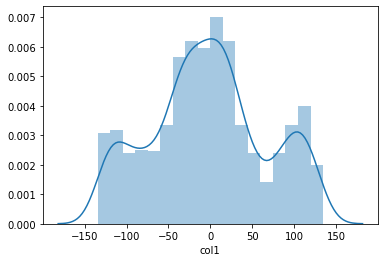

In [43]:
sns.distplot(df['col1'],hist=True)

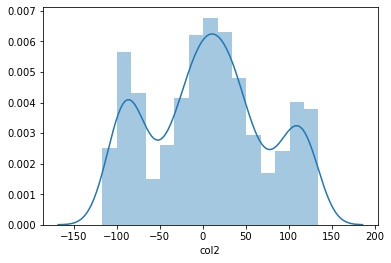

In [44]:
sns.distplot(df['col2'],hist=True)

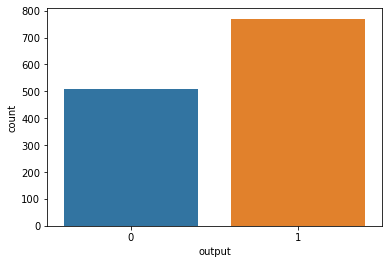

In [47]:
sns.countplot(x=df['output'])

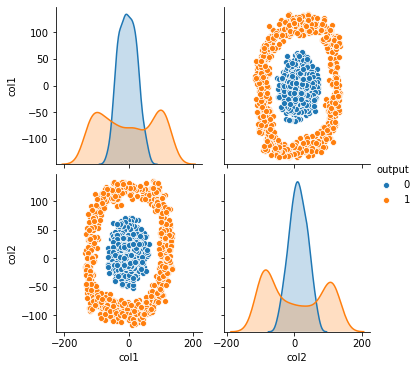

In [48]:
sns.pairplot(df,hue='output')

<h2>From above plot it is very cleary visibe that two outcomes are separated as two different clusters. One is inside the other . By using logistic regression, the two clases can be divided by a circle separating the the cluster. But as we studied logistic regression might not be the ideal method to distinguish the two points. Support vector machine dipicts the best line that spearates the maximum distance between the datapoints. Using SVM RBF kernal method the data is taken to higher dimention and separated by maximum distance between the datapoints in hyperplane. When the above data is converted to higher dimension
 it is easy to differentiate between the data points with higher accuracy</h2>